<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/221213_Business_Forecasting_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2022/09/05/business-forecasting-using-python/

In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly.express as px

import datetime
from datetime import date, timedelta

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

import warnings

In [2]:
url = 'https://statso.io/wp-content/uploads/2022/11/adidas-quarterly-sales.csv'

In [4]:
data = pd.read_csv(url)

In [5]:
data.head()

,Time Period,Revenue
0,2000Q1,1517
1,2000Q2,1248
2,2000Q3,1677
3,2000Q4,1393
4,2001Q1,1558


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Time Period  88 non-null     object
 1   Revenue      88 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


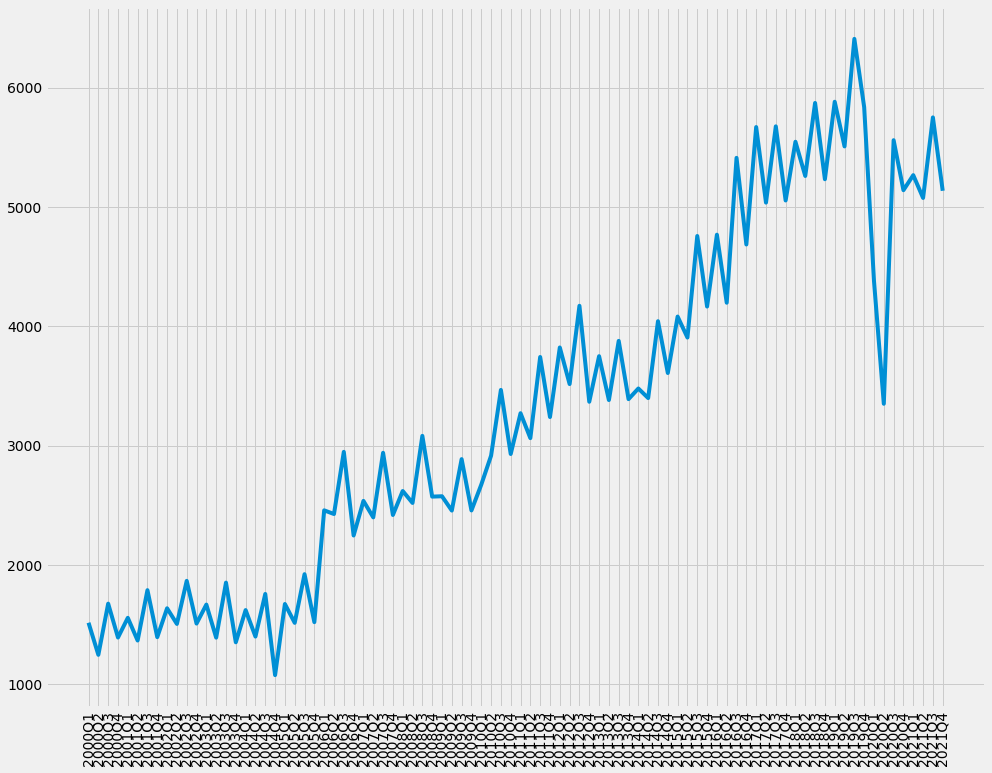

In [12]:
plt.figure(figsize=(15,12))
plt.plot(data['Time Period'], data['Revenue'])
plt.xticks(rotation=90)
plt.show()

In [17]:
px.line(data, x='Time Period', y='Revenue', title='Q Sales for Adidas (MioE)', markers=True).show()

<Figure size 432x288 with 0 Axes>

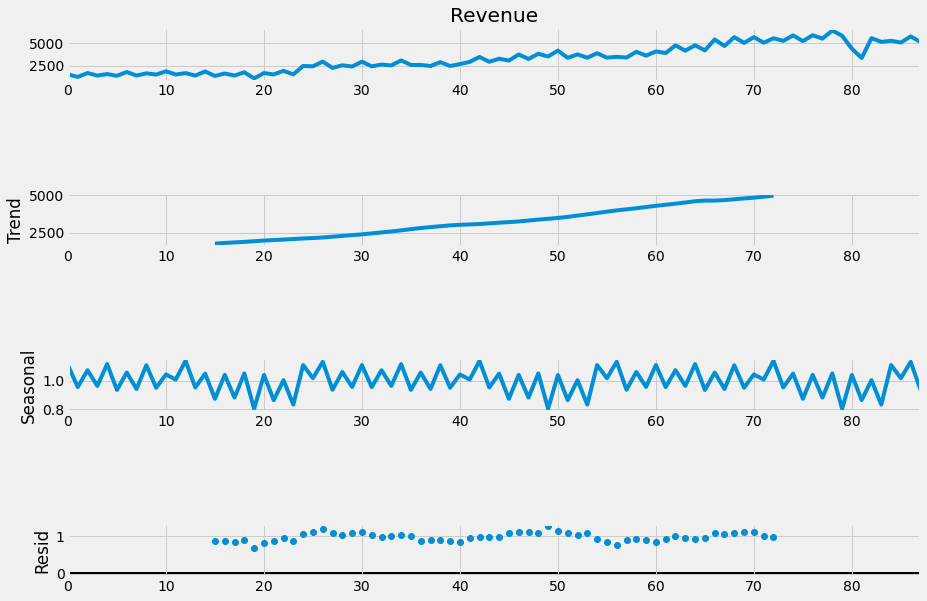

In [21]:
result = seasonal_decompose(data['Revenue'], model='multiplicative', period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15,10)
fig.show();

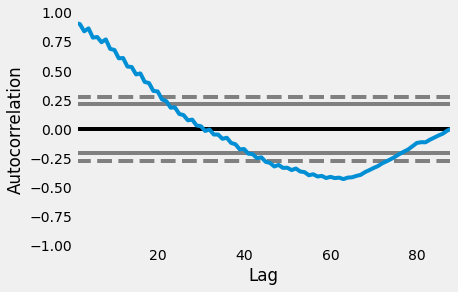

In [22]:
pd.plotting.autocorrelation_plot(data['Revenue'])

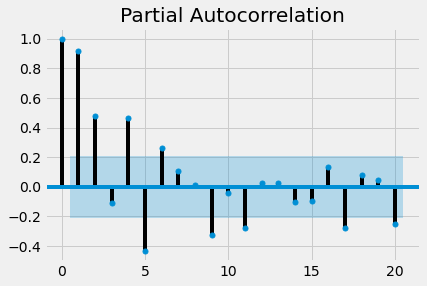

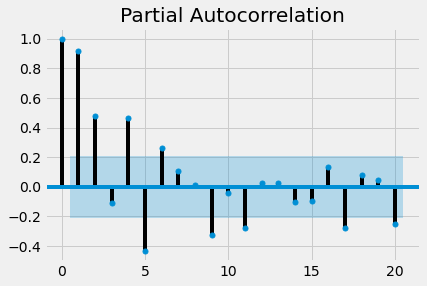

In [26]:
plot_pacf(data['Revenue'], lags=20)

In [27]:
p = 5 # going down after the fifth bar of the first boundary
q = 2 # 2 points away from all other points
d = 1 # as series is seasonal

In [37]:
mod = sm.tsa.statespace.SARIMAX(data['Revenue'], order=(p,d,q), seasonal_order=(p,d,q,12))
res = model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [38]:
print(res.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            Revenue   No. Observations:                   88
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -548.520
Date:                            Tue, 13 Dec 2022   AIC                           1127.041
Time:                                    17:33:23   BIC                           1161.803
Sample:                                         0   HQIC                          1140.921
                                             - 88                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5796      0.391     -4.044      0.000      -2.345      -0.814
ar.L2         -1.4321      0.587   

In [39]:
pred = res.predict(len(data), len(data)+7)
print(pred)

88    6078.793918
89    5186.311373
90    6293.196600
91    5751.905629
92    5911.946881
93    5499.784229
94    6389.627988
95    5728.806969
Name: predicted_mean, dtype: float64


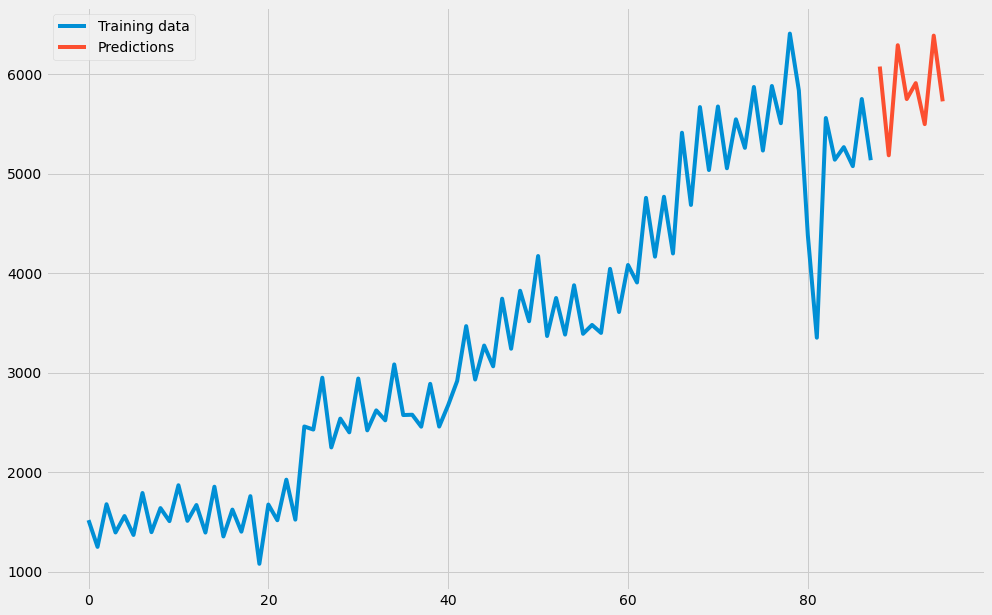

In [40]:
data['Revenue'].plot(legend=True, label='Training data', figsize=(15,10))
pred.plot(legend=True, label='Predictions')